2022-06-14 19:26:23.204247: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-14 19:26:23.261749: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-14 19:26:23.360240: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-14 19:26:23.361004: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9152157816673871935
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 16152002560
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9824952314838417804
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]
Num GPUs Available:  1
Loading Sober-Drunk Face Dataset, from Patras University

Samples total: 160

Dataset splitting: 

Training set: 140
Test set: 20

MinMax normalization
dataset shape:  (140, 128, 160, 3)
min:  0.0
max:  1.0

MinMax normalization
dataset shape:  (20, 128, 160, 3)
min:  0.0
max:  1.0

 Loading pre-trained model


2022-06-14 19:26:26.168864: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-14 19:26:26.169836: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-14 19:26:26.170523: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-14 19:26:26.171293: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-14 19:26:26.172027: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 160, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 40, 128)       0     

2022-06-14 19:26:28.922672: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/205


2022-06-14 19:26:30.484625: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


2/2 [==============================] - 11s 1s/step - loss: 0.7522 - accuracy: 0.7500 - val_loss: 0.5910 - val_accuracy: 0.7500
Epoch 2/205
2/2 [==============================] - 0s 104ms/step - loss: 0.7419 - accuracy: 0.7500 - val_loss: 0.5989 - val_accuracy: 0.7500
Epoch 3/205
2/2 [==============================] - 0s 111ms/step - loss: 0.7332 - accuracy: 0.7333 - val_loss: 0.6078 - val_accuracy: 0.7500
Epoch 4/205
2/2 [==============================] - 0s 91ms/step - loss: 0.7254 - accuracy: 0.7500 - val_loss: 0.6171 - val_accuracy: 0.7500
Epoch 5/205
2/2 [==============================] - 0s 90ms/step - loss: 0.7187 - accuracy: 0.7583 - val_loss: 0.6268 - val_accuracy: 0.7000
Epoch 6/205
2/2 [==============================] - 0s 92ms/step - loss: 0.7131 - accuracy: 0.7500 - val_loss: 0.6364 - val_accuracy: 0.7500
Epoch 7/205
2/2 [==============================] - 0s 92ms/step - loss: 0.7085 - accuracy: 0.7000 - val_loss: 0.6456 - val_accuracy: 0.7500
Epoch 8/205
2/2 [==============

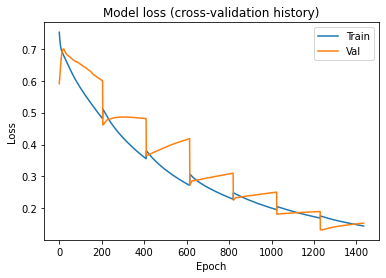

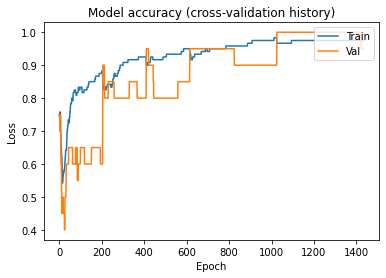

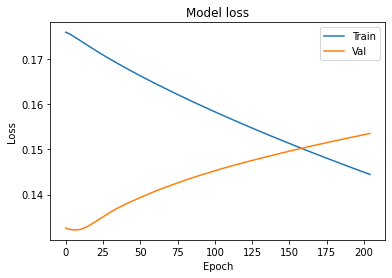

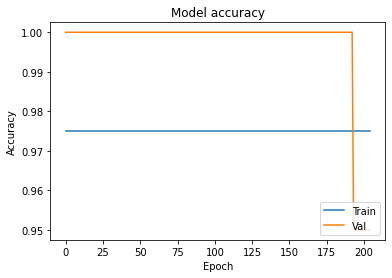

In [1]:
# Defining random seeds to enable reproducibility
from numpy.random import seed
seed(1)

import tensorflow as tf
tf.random.set_seed(1)
 
import random
random.seed(1)
 
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.python.client import device_lib
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold


print(device_lib.list_local_devices())
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


def load_patras_dataset():
    """
    Loads the datasets encoded in .pkl files and returns its decoded form.

    Returns
    -------
    list
        A list of n-dimensional arrays representing the subjects samples that will be used to \\
        train the drunkenness classification model.
    list
        A list of n-dimensional arrays representing the subjects samples that will be used to \\
        test the drunkenness classification model.
    ndarray
        A n-dimensional array representing the training set labels.
    ndarray
        A n-dimensional array representing the test set labels.
    """

    print("Loading Sober-Drunk Face Dataset, from Patras University")
    
    # Defining the sample and label sets filenames
    sets = [
        "Insert the unbalanced x_training-set.pkl file path here",
        "Insert the unbalanced x_test-set.pkl file path here",
        "Insert the unbalanced y_training-set.pkl file path here",
        "Insert the unbalanced y_test-set.pkl file path here"
    ]
 
    # Defining an empty list for storing the decoded datasets
    loaded_datasets = []
 
    # Iterating over the dataset files
    for set_ in sets:
        # Opening the .pkl file in read mode
        with open(set_, 'rb') as file:
            # Appending the decoded dataset to the datasets list
            loaded_datasets.append(pickle.load(file))
    
    # Unpacking the datasets list into individual subsets
    x_train, x_test, y_train, y_test = loaded_datasets
    
    # Converting the label list to the n-dimensional array format
    y_train= np.array(y_train)
    y_test = np.array(y_test)
 
    # Printing the dataset length
    print("\nSamples total: {0}".format((len(x_train)) + (len(x_test))))
    
    print("\nDataset splitting: ")
    
    # Printing the training and test sets length
    print("\nTraining set: {0}".format(len(x_train)))
    print("Test set: {0}".format(len(x_test)))
    
    # Returning the training and test sets, and its respective labels
    return x_train, x_test, y_train, y_test


def min_max_norm(dataset):
    """
    Normalizes the keyframes according to the minimum-maximum norm, \\
    such that pixel values ranges from 0 to 1.

    Parameters
    ----------
    dataset : list
        A list of n-dimensional arrays representing the subjects keyframes.

    Returns
    -------
    ndarray
        A n-dimensional array representing keyframes with pixel values ranging from 0 to 1.
    """

    # Converting the dataset type from list to n-dimensional array
    dataset = np.asarray(dataset, dtype="int16")

    # Finding the keyframes minimum and maximum values
    x_min = dataset.min(axis=(1, 2), keepdims=True)
    x_max = dataset.max(axis=(1, 2), keepdims=True)

    # Applying the minimum-maximum norm to each keyframe
    norm_dataset = (dataset - x_min) / (x_max - x_min)

    # Printing the minimum and maximum values from a given sample for sanity check
    print("\nMinMax normalization")
    print("dataset shape: ", norm_dataset.shape)
    print("min: ", norm_dataset[0].min())
    print("max: ", norm_dataset[0].max())

    # Returning the normalized dataset
    return norm_dataset


def visualize_model_history(hist):
    """
    Displays the training process loss and accuracy history from a given fold of the \\
    stratified cross-validation procedure.

    Parameters
    ----------
    hist : dictionary
        A dictionary conataining loss and accuracy values lists from the training and \\
        validation sets.
    """

    # Displaying the training and validation loss history
    plt.figure()
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    
    # Displaying the training and validation accuracy history
    plt.figure()
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='lower right')
    
    # Showing the training process loss and accuracy history
    plt.show()


def visualize_model_history_cv(training_loss, training_accuracy, validation_loss, validation_accuracy):
    """
    Displays the training process loss and accuracy history throughout the \\
    stratified k-fold cross-validation procedure.

    Parameters
    ----------
    training_loss : list
        A list conataining the loss values from the training set throught the \\
        stratified k-fold cross-validation procedure.
    training_accuracy : list
        A list conataining the accuracy values from the training set throught the \\
        stratified k-fold cross-validation procedure.
    validation_loss : list
        A list conataining the loss values from the validation set throught the \\
        stratified k-fold cross-validation procedure.
    validation_accuracy : list
        A list conataining the accuracy values from the validation set throught the \\
        stratified k-fold cross-validation procedure.
    """

    # Displaying and saving the training and validation loss history
    plt.figure()
    plt.plot(training_loss)
    plt.plot(validation_loss)
    plt.title('Model loss (cross-validation history)')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.savefig("final_model_tl_learning-curve.pdf", dpi=600, bbox_inches='tight', pad_inches=0)
    
    # Displaying the training and validation accuracy history
    plt.figure()
    plt.plot(training_accuracy)
    plt.plot(validation_accuracy)
    plt.title('Model accuracy (cross-validation history)')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    
    # Showing the training process loss and accuracy history
    plt.show()
    

def transfer_learning():
    """
    Performs the transfer learning strategy from a previously trained base \\ 
    drunkenness classification model. \\ 
    
    In order to leverage the base model representation capability, we transferred \\ 
    this basic knowledge to a more robust classifier capable to identify \\ 
    drunkenness-related features variations. For such, we considered images from all \\
    acquisitions periods, in which the pixels behavior tends to change over time \\ 
    accordingly to the subjects BAC.
    """

    # Loading the training and test datasets
    x_train, x_test, y_train, y_test = load_patras_dataset()

    # Applying the min-max normalization
    x_train = min_max_norm(x_train)
    x_test = min_max_norm(x_test)
    
    # Reshaping datsets to the tensor format (channel last)
    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
    x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)

    print("\n Loading pre-trained model")

    # Loading the base drunkenness classification model
    model = models.load_model('vgg16_sober-drunk_ft-model_bs30_cb-4-5_fold-2.h5')

    # Printing the base model summary
    model.summary()
    
    print("\nRemoving top layers")

    # Removing the base drunkenness classifier output layer
    model = keras.Sequential(model.layers[:-2])

    # Printing the base model structure again for sanity check
    model.summary()
    
    # Iterating over the model layers
    for layer in model.layers:
        # Freezing the layers weights
        layer.trainable = False
        # Printing the layers 'trainable' parameter for sanity check
        print("{}: {}".format(layer.name, layer.trainable))
 
    print("\nAdding new dense layers\n")

    # Adding a Flatten layer to the base model output
    model.add(Flatten(name="flatten"))

    # Adding a hidden layer to the base model output
    model.add(Dense(units=10, activation='relu', name="dense_layer_1"))

    # Adding an output layer to classify the received features as sober (0) or drunk (1)
    model.add(Dense(units=1, activation='sigmoid', name="output"))
    
    # Iterating over the model layers
    for layer in model.layers:
        # Printing the layers 'trainable' parameter for sanity check
        print("{}: {}".format(layer.name, layer.trainable))


    # Shuffling the training set organization
    x_train, y_train = shuffle(x_train, y_train, random_state=1)
    
    # Defining the stratified cross-validation folds
    folds = list(StratifiedKFold(n_splits=7, shuffle=False, random_state=None).split(x_train, y_train))
    
    # Defining the optmization function
    adam = optimizers.Adam(learning_rate=1e-5, amsgrad=True)
    
    # Defining the early stopping callback
    callback = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, restore_best_weights=True, verbose=1)
    
    # Compiling the model
    model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=False),
                optimizer=adam,
                metrics=['accuracy'])
    
    # Printing the final model summary
    model.summary()

    print("\n")
 
    # Instantiating empty lists for storing the model training and validation loss history
    cv_training_acc = []
    cv_training_loss = []
    
    # Instantiating empty lists for storing the model training and validation accuracy history
    cv_val_acc = []
    cv_val_loss = []
    
    # Instantiating an empty list for storing the model classification accuracies on the test set samples
    fold_acc = []
    
    # Defining weights for sober and drunk classes in order to prevent the class  
    # imbalance from influencing the loss function
    weight_for_0 = (1 / 35)*(140)/2.0 
    weight_for_1 = (1 / 105)*(140)/2.0
    
    class_weights = {0: weight_for_0, 1: weight_for_1}
    
    # Iterating over the stratified cross-validation folds
    for j, (train_idx, val_idx) in enumerate(folds):
        print('\nFold ',j)
        # Defining the training and validation sets
        X_train_cv, y_train_cv = x_train[train_idx], y_train[train_idx]
        X_valid_cv, y_valid_cv = x_train[val_idx], y_train[val_idx]

        print("\nTraining with {0} samples and validating with {1} samples\n".format(len(X_train_cv), len(X_valid_cv)))

        # Fitting the model
        history = model.fit(x=X_train_cv, y=y_train_cv, 
                          validation_data=(X_valid_cv, y_valid_cv),
                          shuffle=False,
                          batch_size=60,
                          #callbacks=[callback],
                          epochs=205,
                          class_weight=class_weights,
                          verbose=1)
        
        # Updating the training loss and accuracy history lists
        cv_training_acc += history.history['accuracy']
        cv_training_loss += history.history['loss']

        # Updating the validation loss and accuracy history lists
        cv_val_acc += history.history['val_accuracy']
        cv_val_loss += history.history['val_loss']
        
        # Evaluating the model on unseen data
        test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)

        # Appending the model classification accuracies to the test set accuracies list
        fold_acc.append(test_acc)

        # Printing the model classification accuracy on unseen data
        print('\nFold ',j)
        print("\nTest accuracy: ", test_acc)
        print("Test loss: ", test_loss)
        
        # Saving the model obtained in the stratified cross-validation j-th fold
        model.save('sober-drunk_final-model-VGG16_fold-{0}.h5'.format(j))
    
    # Printing the model classification accuracy in each fold of the stratified 
    # cross-validation
    print("\nK-Fold accuracy: ", fold_acc)

    # Printing the model average accuracy along the stratified k-fold cross-validation 
    # procedure
    print("\nAverage accuracy: ", np.mean(fold_acc))

    # Printing the standard deviation of accuracies obtained throughout the 
    # stratified k-fold cross-validation procedure
    print("K-Fold Standard deviation: ", np.std(fold_acc))
    

    print("\nClassification report: ")

    # Obtaining the test samples class probabilities
    y_prob = model.predict(x_test)

    # Obtaining the binary label from the model output probabilities
    y_hat = (y_prob > 0.5).astype(int)
    
    # Printing the classification performance report
    report = classification_report(y_test, y_hat, target_names=['sober', 'drunk'])
    print(report)
    
    print("\nConfusion Matrix: ")

    # Printing the confusion matrix
    matrix = confusion_matrix(y_test, y_hat)
    print(matrix)
    
    tn, fp, fn, tp = matrix.ravel()
    print("\nTrue Negatives: ", tn)
    print("False Positives: ", fp)
    print("False Negatives: ", fn)
    print("True Positives: ", tp)
    
    # Displaying the training process history
    visualize_model_history_cv(cv_training_loss, cv_training_acc, cv_val_loss, cv_val_acc)
    visualize_model_history(history)
    

# Running the transfer learning from base model to the final model
transfer_learning()
